# Support Vector Machine

Many different possible lines with different future consequences...which is the best?

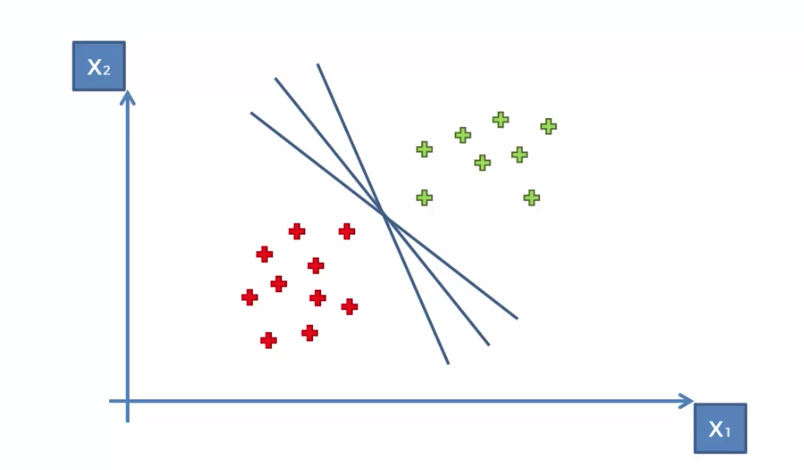

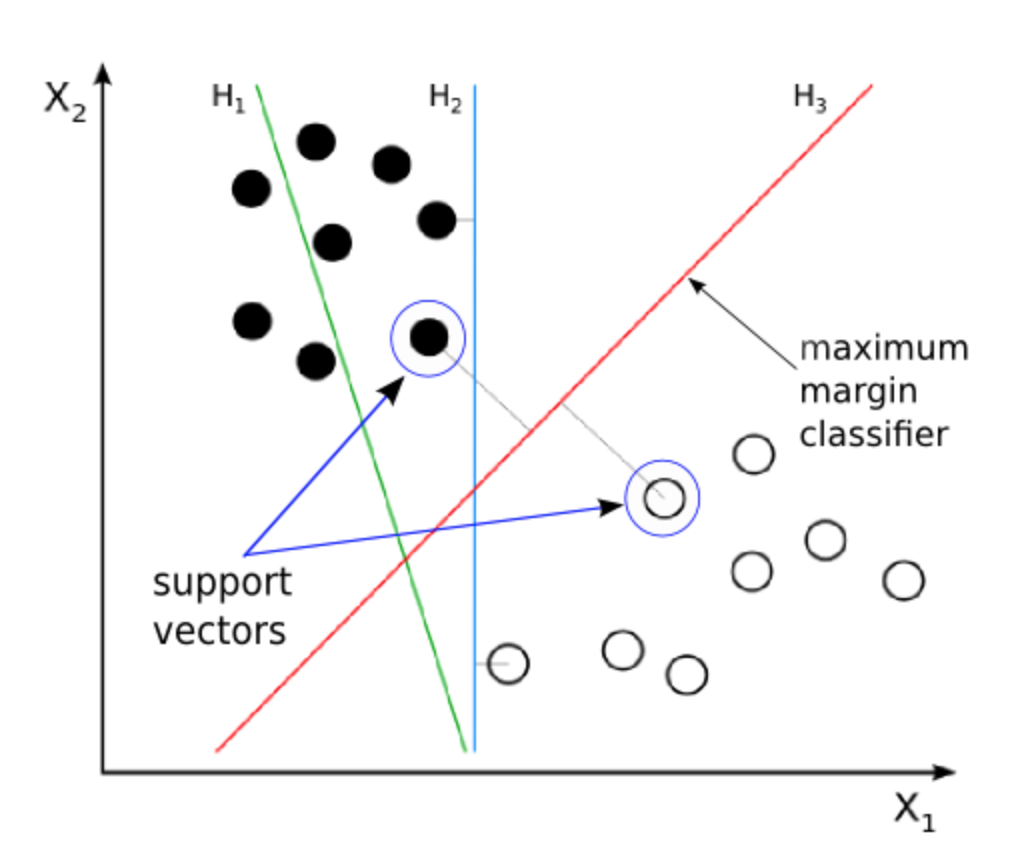

- H1 does not separate the classes
- H2 does, but only with a small margin
- H3 separates them with the maximum margin
- margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples (support vectors) that are closest to this hyperplane
- it uses a subset of training points in the decision function ( support vectors), so it is also memory efficient
- The primary reason for having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting

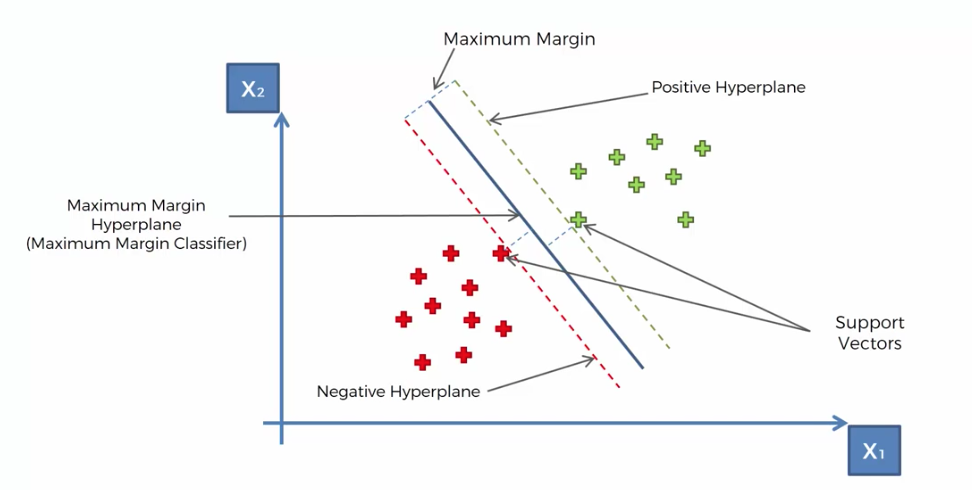

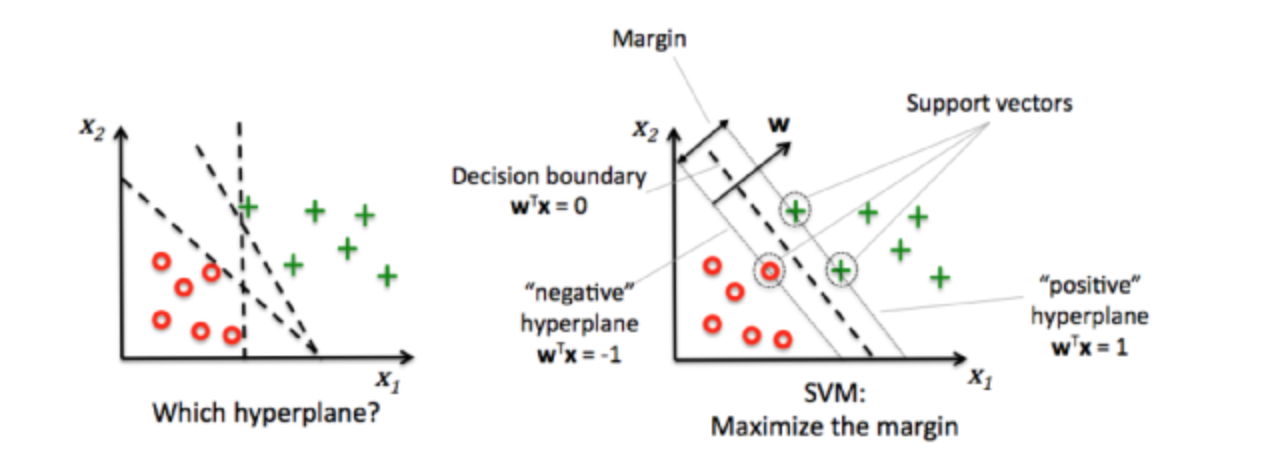

Positive and Negative Hyperplanes can be expressed like this:
$$w_0+w^Tx_{positive}=1$$
$$w_0+w^Tx_{negative}=-1$$

Subtracting the two linear equations:
$$w^T \left( x_{positive}-x_{negative} \right) = 2$$

Normalizing by the length of vector w:
$$\frac {w^T \left( x_{positive}-x_{negative} \right)} {\Vert w \Vert} = \frac {2} {\Vert w \Vert}$$

The LHS of the equation is the distance between the positive and negative hyperplane - which is the **margin** that we want to maximize. 

So, **objective function** becomes the maximization of $$\frac {2}{\Vert w \Vert}$$ with constraint of samples being classified correctly. The constraing is expressed as:

$$w_0+w^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1 \\ \lt -1 & \quad if \; y^{(i)}=-1 \end{cases}$$

which can also be expressed as...
$$y^{(i)} \left ( w_0+w^Tx^{(i)} \right ) \ge 1 \quad \forall i$$ 
meaning wTx should be same sign as y.

We can either:
1. maximize 2/|w|
2. minimize |w|/2

Linearly seperable:
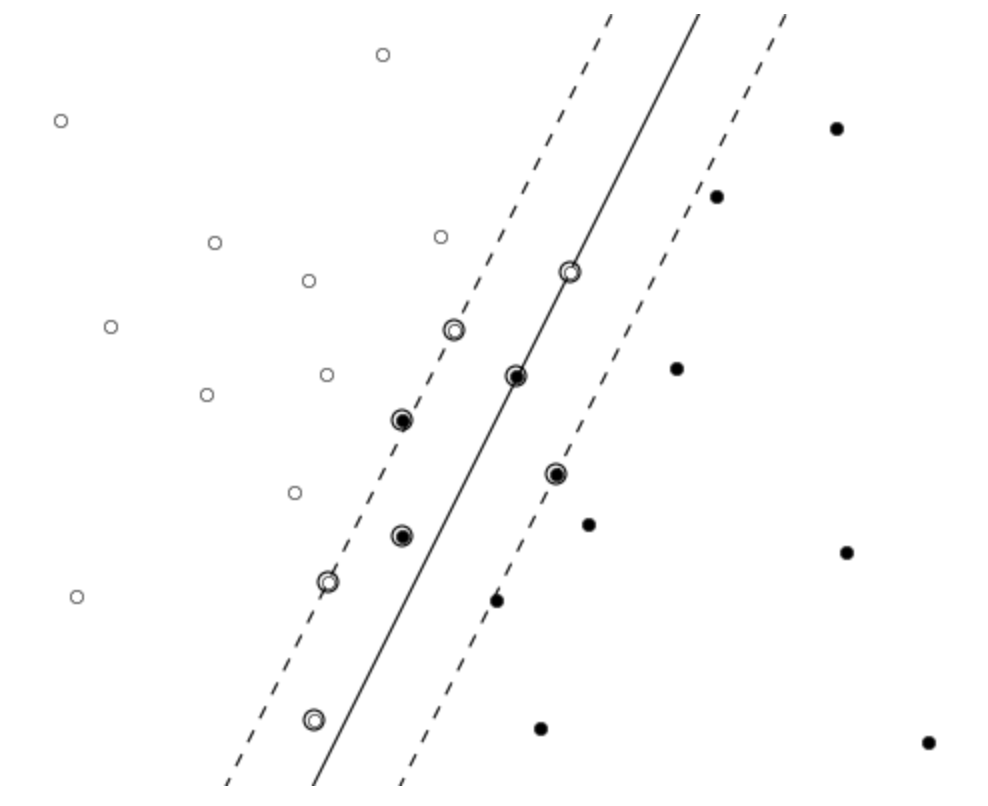

Non-linearly seperable:
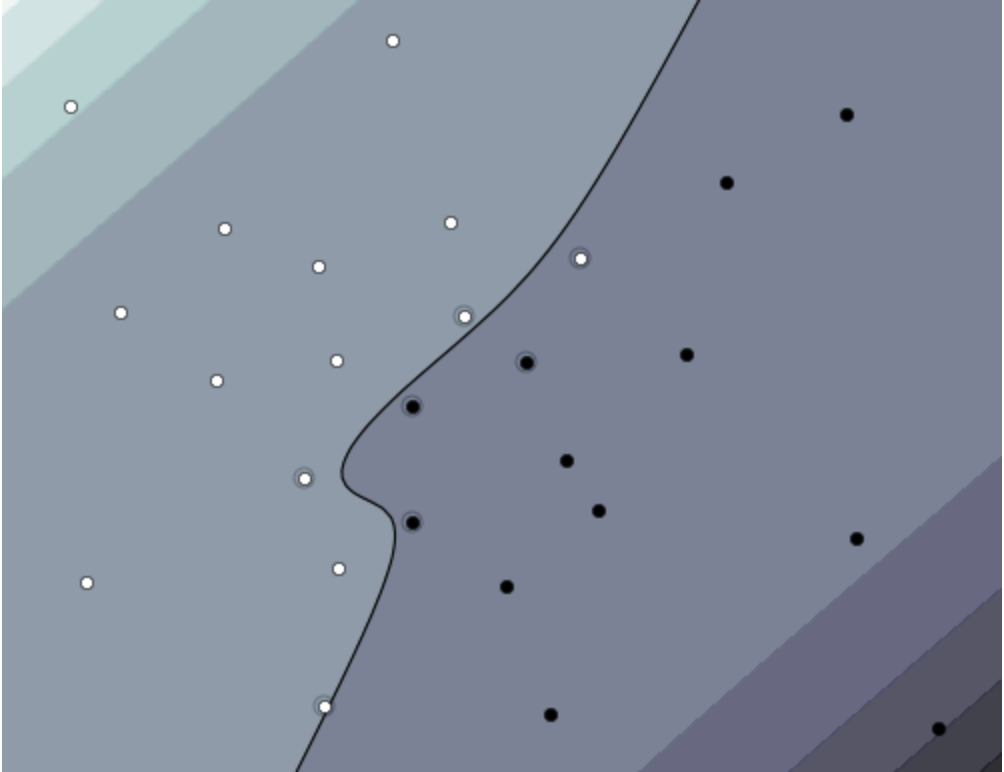

For non-linearly seperable case, slack variable is needed for linear constraints to be relaxed to allow convergence of optimization in presence of misclassifications under appropriate cost penalization.

$$w^Tx^{(i)} = \begin{cases} \ge 1 & \quad if \; y^{(i)}=1-\xi^{(i)} \\ \lt -1 & \quad if \; y^{(i)}=-1 +\xi^{(i)}\end{cases}$$

This gives new objective to be minimized:
$${\Vert w \Vert}^2 + C \left ( \sum_i \xi^{(i)} \right )$$

- large C: large error penalties
- small C: less strict about misclassifications
- use C to control width of margin and tune bias-variance trade-off

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/Nicha/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


# Fitting Linear Kernal SVM

In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

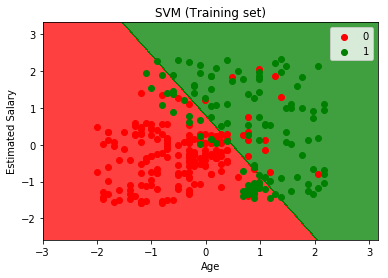

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

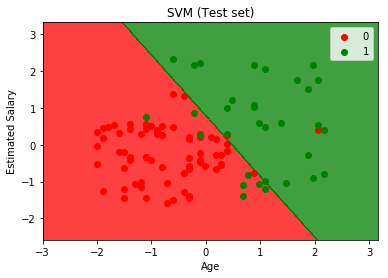

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Kernal SVM

These points are not linearly seperable:

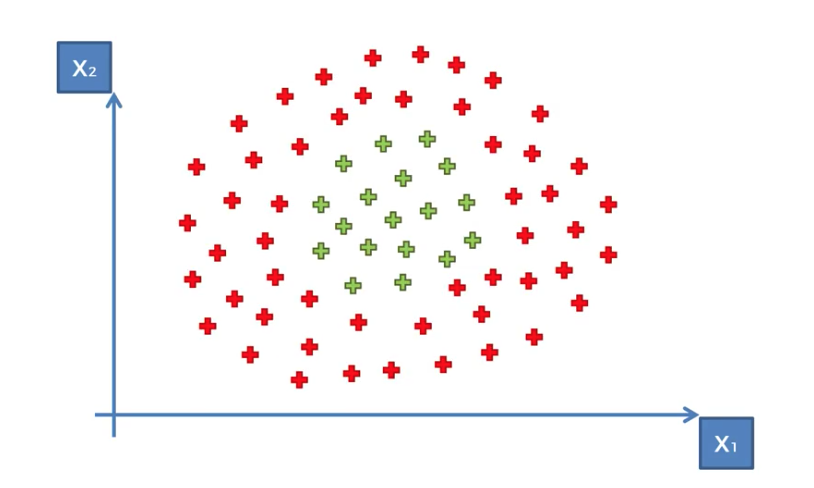

In 1D, hyperplane is a dot, but can't seperate with just one dot below:
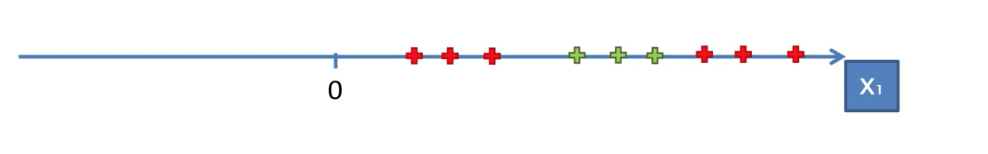

Apply transformation so it's linearly seperable:
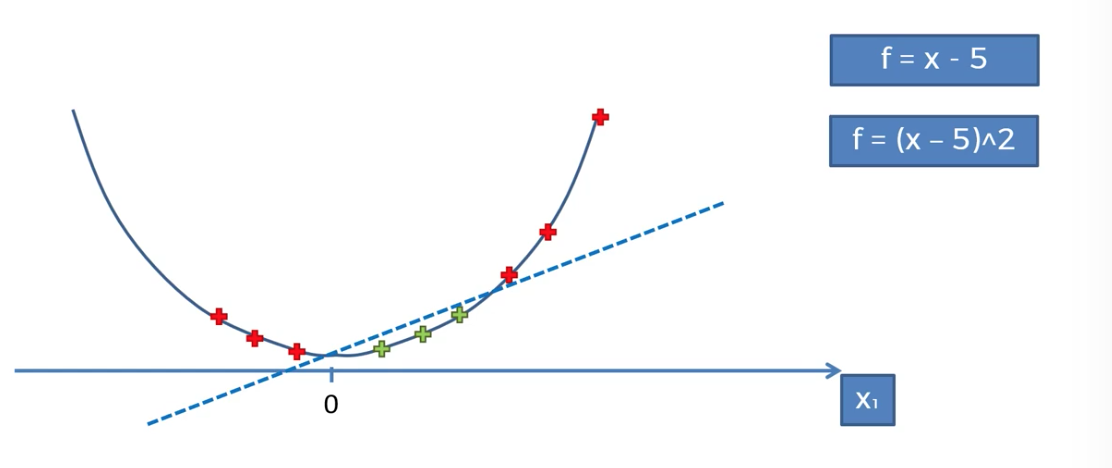

Same idea for 2D/3D space...
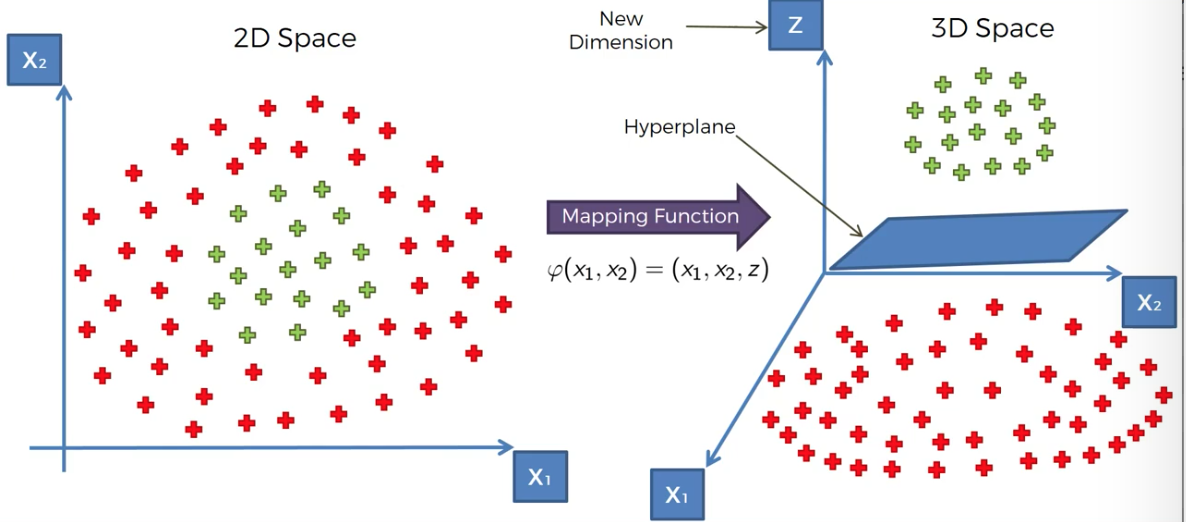

Project back to 2D space...
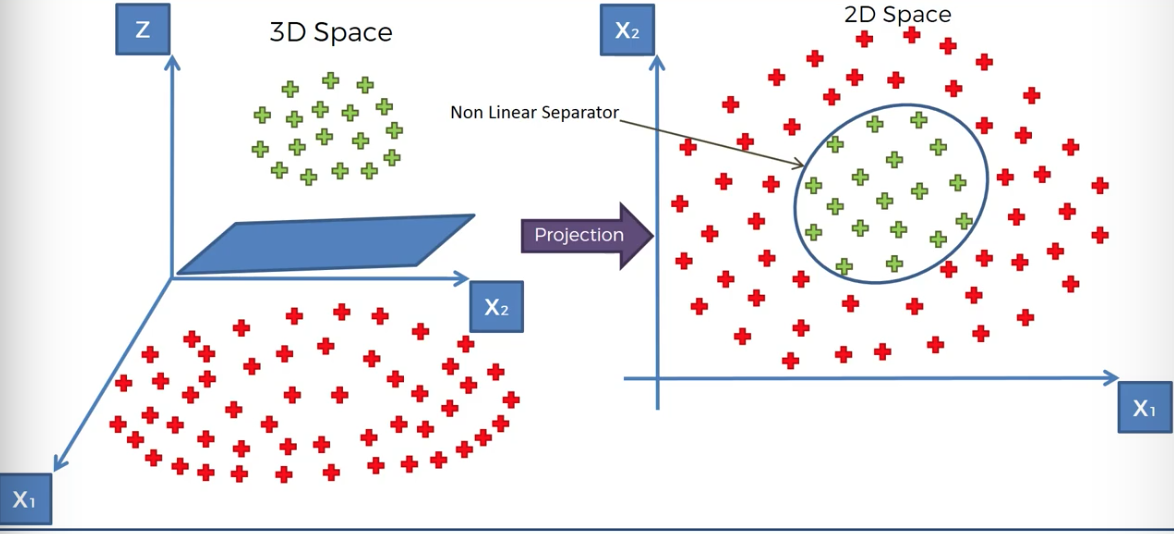

However, mapping to higher dimension space can be computationally intensive! So we explore the **Kernal Trick** approach.

Gaussian RBF Kernel:
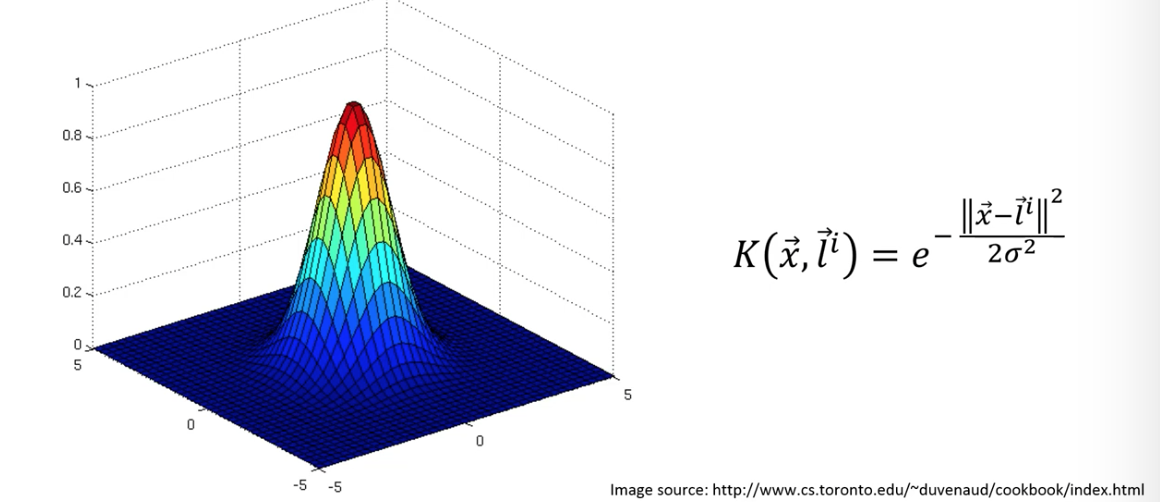

- function applied to 2 vectors:
    - x - data
    - l - landmark (i means there could be several landmarks)
        - middle of square plane
- e to large number (pt far from landmark) is close to 0
- e to number close to 0 (pt close to landmark) is close to 1

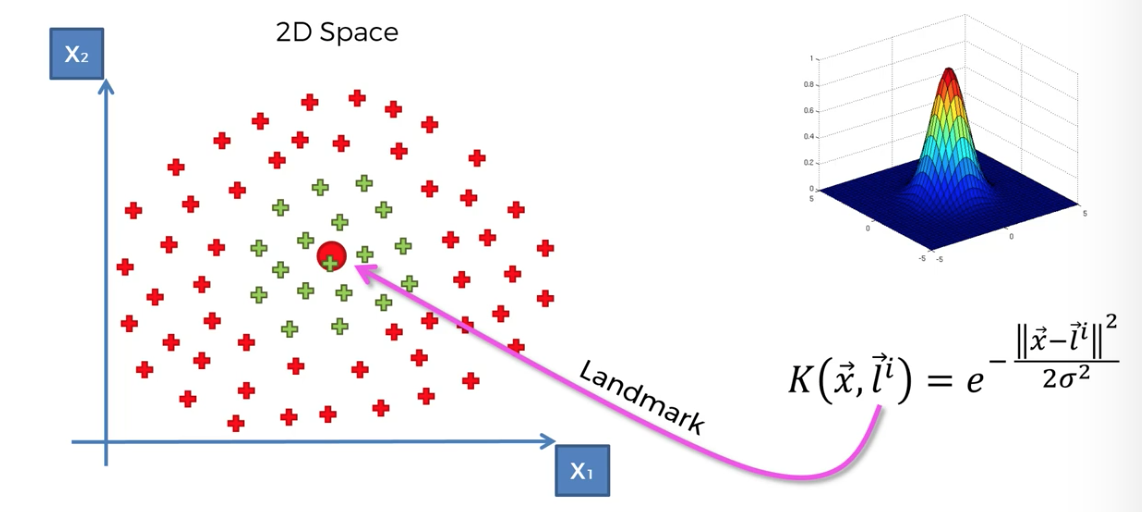

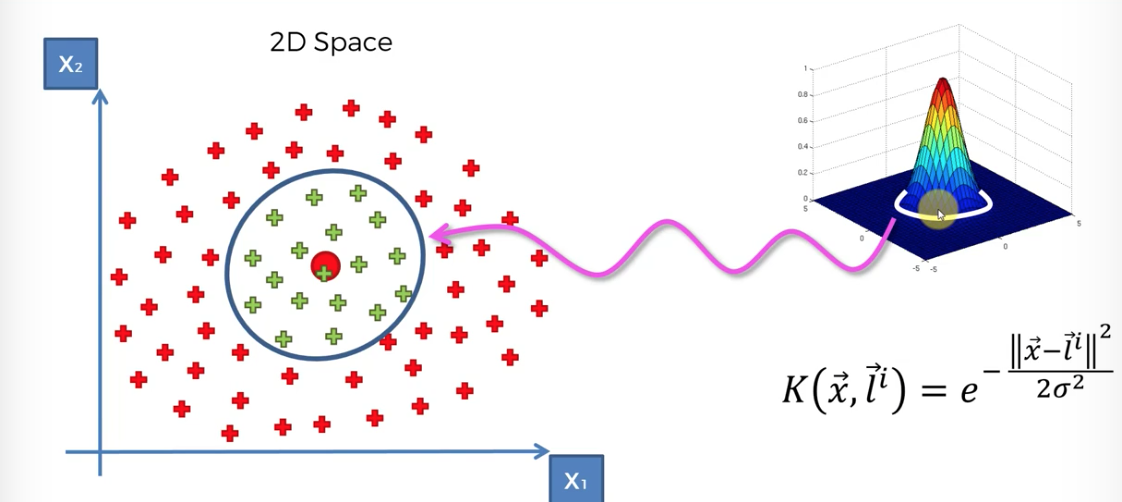

Red pt will get value of 0, anything within circumference will get nonzero value (green pts).
- increasing sigma will increase circumference
- decreasing sigma wll decrease circumference

More compled cases...
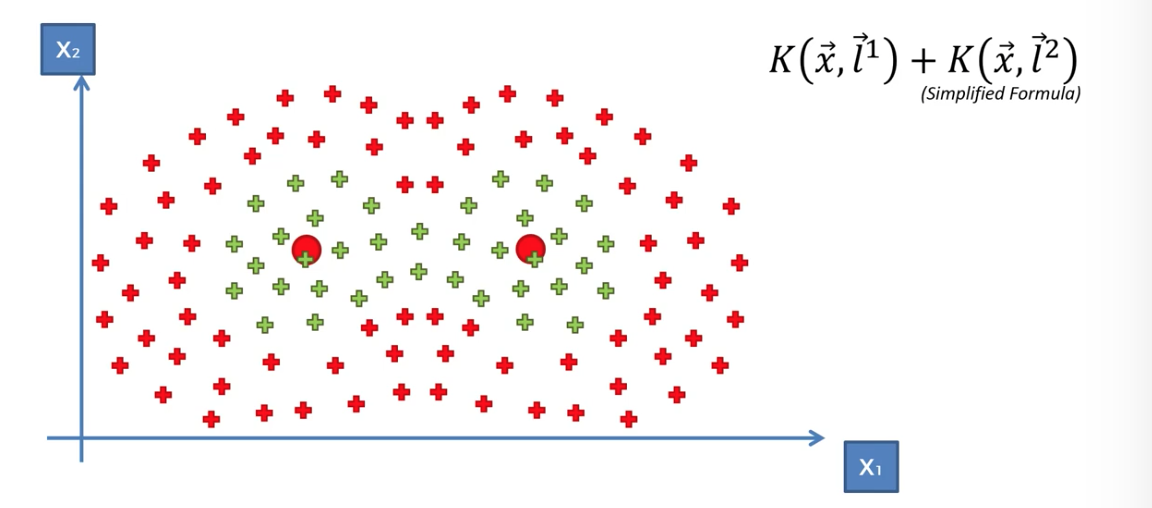
- green when eqn >0; red when eqn =0

# Different types of Kernal Functions

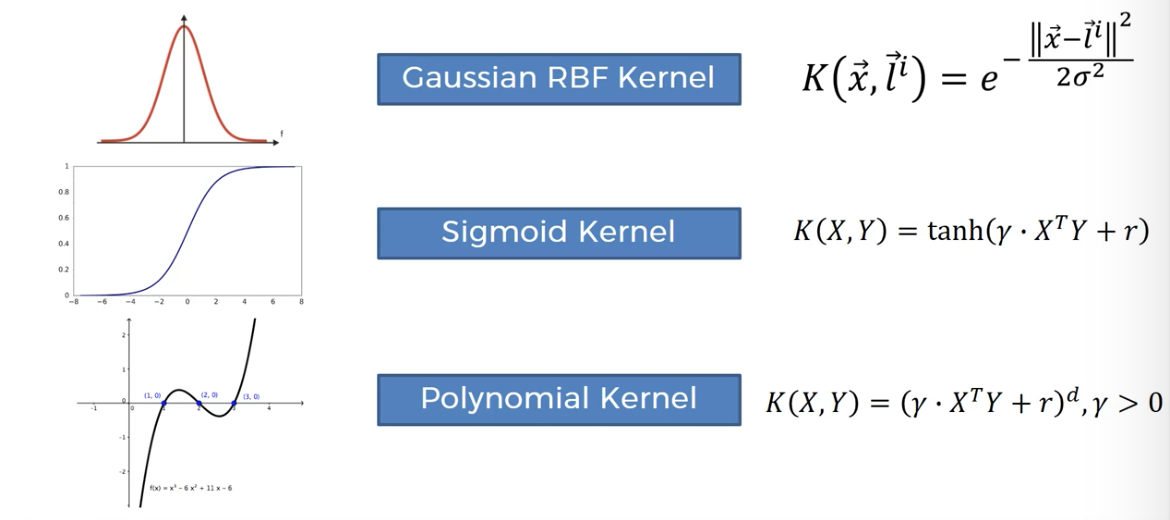

Other kernal functions:
http://mlkernels.readthedocs.io/en/latest/kernels.html

In [ ]:
classifier = SVC(kernal = 'rbf', random_state = 0) #default is rbf

svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)